In [4]:
#example 11

%matplotlib inline
import requests
import io
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import textstat
from statistics import mean
from scipy.stats import pearsonr
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
file = pd.read_csv('CameronData.csv')
file.Comments=file.Comments.astype(str)
file.Posting=file.Posting.astype(str)

In [10]:
#Put the contents of the csv file into the dataframe
df_cameron = file

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = df_cameron['Comments'].to_list()

In [12]:
#convert text to lower case
list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]

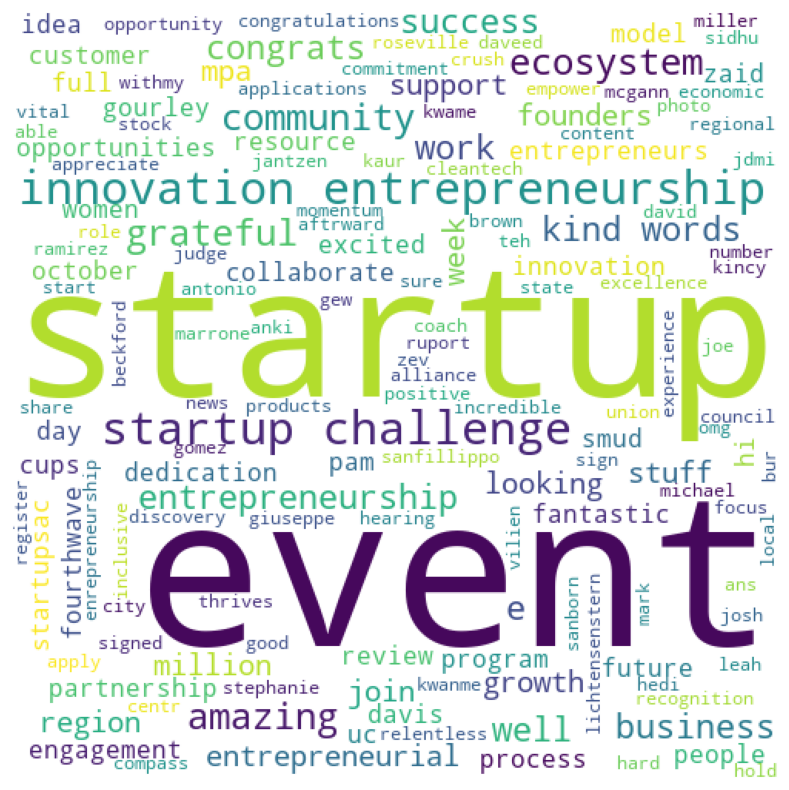

Done, Q5WordCloud.png is ready.


In [28]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','thank','cameron','great','carlsen','congragulations','sacramento','laura','sal','dick','jasso','latoya','mariah','franklin','burris','isaac']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q5WordCloud.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q5WordCloud.png is ready.")

#### Looking at the word cloud generated here, the most common words are startup and event. Overall the comments seem to reflect individuals who attended the events posted by the Carlsen Center for Innovation & Entrepreneurship parroting the buzzwords from the posts about the events. It appears that amongst industry trends the comments focus heavily on supporting startups in the greater Sacramento Region. Individuals attending these events are either new business owners or investors looking for opportunities. Focusing your advertising language to attract people who do not understand what 'making innovation and entrepreneurship simple, accessible, and pervasive' may create a larger social impact, driving up interest in donors and investors in the entrepreneurs the Carlesn Center looks to help with their programs.

In [10]:
#Put the contents of the csv file into the dataframe
df_cameron = file

# I am converting dictionary to a list so I can analyze the data
#yelp_review_list = list(yelp_review_dictionary.lyrics)
list_cameron = []
list_cameron = df_cameron['Comments'].to_list()
list_cameron_temp = df_cameron['Posting'].to_list()
for x in list_cameron_temp:
    list_cameron.append(x)

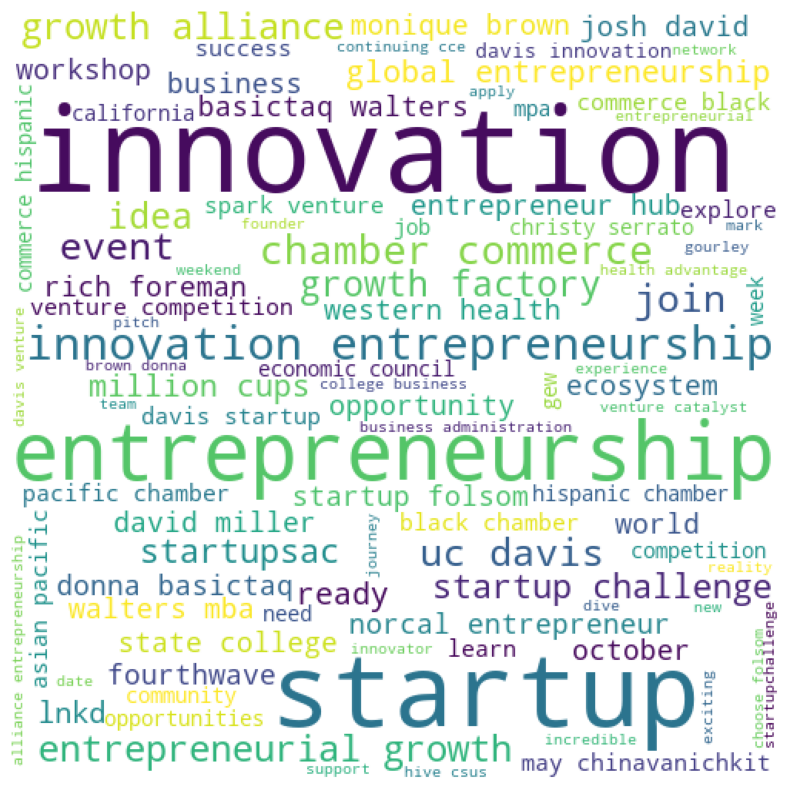

Done, Q5WordCloud.png is ready.


In [12]:

#convert text to lower case
list_cameron_lower = [i.lower() for i in list_cameron]

#remove special characters
list_cameron_lower = [re.sub(r"[^a-zA-Z]", " ", text) for text in list_cameron]
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in list_cameron_lower:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())


#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

delinked_cameron=[]
#Remove links
for text in clean_cameron:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        delinked_cameron.append(remove_com)

#Remove special characters
delinked_cameron = [unidecode.unidecode(text) for text in delinked_cameron]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in delinked_cameron]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

clean_cameron=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        clean_cameron.append(string)

comment_string = ''
for eachletter in  str(cleantext):
    comment_string += eachletter

input = TextBlob(comment_string)

noun_phrases = input.noun_phrases

comment_string = ''
for eachletter in  str(noun_phrases):
    comment_string += eachletter

listofWords = ['\'','thank','cameron','great','carlsen','congragulations','sacramento','laura','sal','dick','jasso','latoya','mariah','franklin','burris','isaac','arlene j']
for z in listofWords:
    comment_string = comment_string.replace(z,'')

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords=stopwords_list,
            min_font_size = 10).generate(comment_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('Q5WordCloud.png', bbox_inches='tight', dpi=300)
plt.show()

print("Done, Q6WordCloud.png is ready.")

#### Looking at Posting and Comments combined we see mention of norcal, davis, hispanic chamber, western health, chamber of commerce, venture capital competition, bank of commerce. These are all elements of local industry sectors. The primary recommended focus would be to go to the Sacramento or Davis City Council or Chamber of Commerce to see what the Carlsen Center can guide its entrepreneur's to in regards to assisting the Hispanic or Asian Pacific communities, as well it may be a good idea for Carlsen to reach out to FourthWave, a self proclaimed accelerator for women-led technology businesses. 